## Linear Models

This notebook has three examples for the estimators implemented in the linear_model package. Each estimator is implemented using only Python and the Numpy library for linear algebra.

The models on this package are classified as Generalized Linear Models (GLMs).

### 1. Linear Regression

To test the linear regression class we will be using the boston house prices dataset, which has 506 samples and 13 features. The objective is to predict the median house price in a given neighborhood.

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()

# Load the boston dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In order to plot the model we will use only one variable for our first regression. The RM feature is the average number of rooms per dwelling.

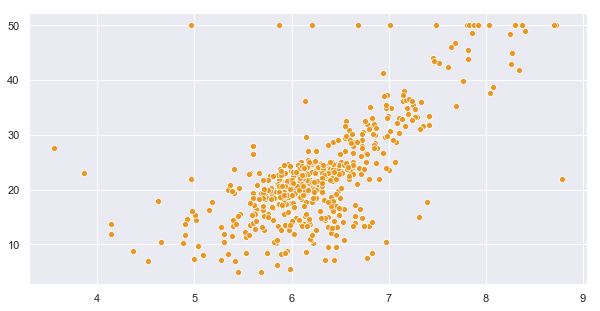

In [8]:
x = boston.data[:, 5]
y = boston.target.flatten()
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x, y, color='#ea9620')

To fit the linear regression model we can use the normal equation, singular value decomposition or gradient descent.

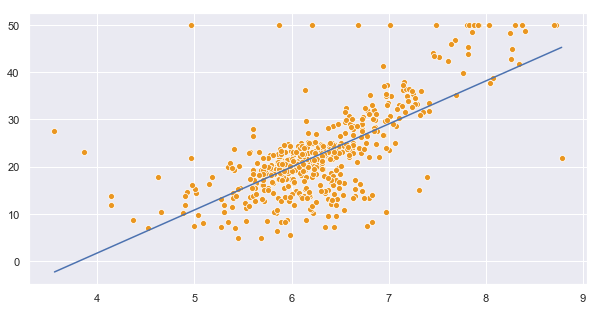

In [9]:
from estimator.linear_model import LinearRegression
lr = LinearRegression(solving_method='svd')
lr.fit(x.reshape(-1, 1), y)  # x must have two dimensions

# plot feature and regression line
plt.figure(figsize=(10, 5))
ax1 = sns.scatterplot(x, y, color='#ea9620')
ax2 = sns.lineplot(x, x * lr.parameters[1] + lr.parameters[0])

### 2. Ridge Regression

Ridge is a linear regression with l2 regularization (see Tikhonov regularization). The following example is using polynomial features to fit a curve and we can see the difference between a model with and without regularization.

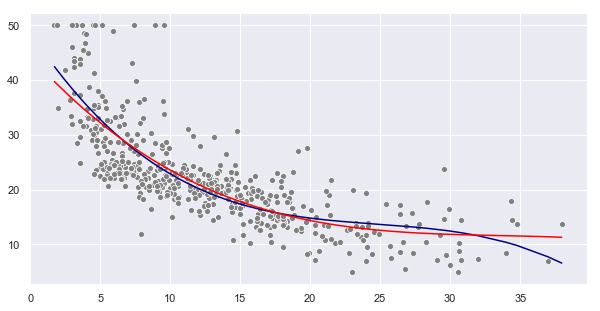

In [10]:
# Polynomial features
x = boston.data[:, 12]
xp = np.zeros((506, 3))
xp[:, 0] = x
xp[:, 1] = np.power(x, 2)
xp[:, 2] = np.power(x, 3)

lr = LinearRegression()
lr.fit(xp, y)

from estimator.linear_model import RidgeRegression
ridge = RidgeRegression(regularization=100)
ridge.fit(xp, y)

line1 = np.dot(xp, lr.parameters[1:, :]).flatten() + lr.parameters[0]
line2 = np.dot(xp, ridge.parameters[1:, :]).flatten() + ridge.parameters[0]

# plot feature and regression line
plt.figure(figsize=(10, 5))
ax1 = sns.scatterplot(x, y, color='gray')
ax2 = sns.lineplot(x, line1, color='navy')
ax3 = sns.lineplot(x, line2, color='red')

### 3. Logistic Regression

Logistic regression is a linear model where a sigmoid function is used for classification. In the next plot, we can see the decision boundary that our classifier learned to separate both classes (green line).

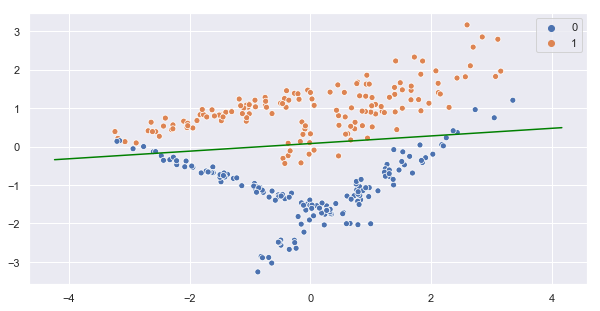

In [13]:
from sklearn.datasets import make_classification
from estimator.linear_model import LogisticRegression

x, y = make_classification(n_samples=300, n_features=2, n_redundant=0, random_state=54)
logit = LogisticRegression(regularization=0.5, num_iter=6000, save_cost=True)
logit.fit(x, y)


plt.figure(figsize=(10, 5))
ax1 = sns.scatterplot(x[:, 0], x[:, 1], hue=y)
# Plot the decision boundary
x_values = [np.min(x[:, 0]) - 1, np.max(x[:, 1]) + 1]
y_values = - (logit.parameters[0] + logit.parameters[1] * x_values) / logit.parameters[2]
ax2 = plt.plot(x_values, y_values, color='green')

It's not possible to find the parameters that minimizes the cost function in closed form. In this case, we are using an iterative algorithm: batch gradient descent. The next plot shows the cost function at each iteration. 

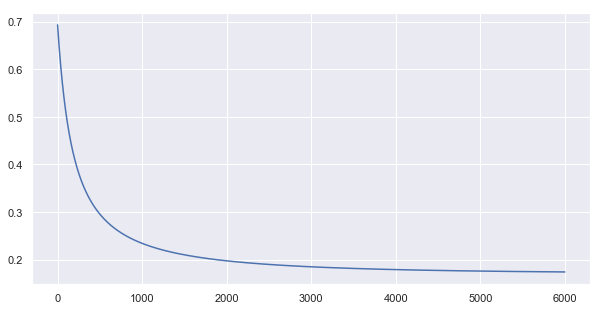

In [15]:
plt.figure(figsize=(10, 5))
ax1 = sns.lineplot(np.arange(logit.num_iterations), logit.grad_descent_cost)